# Computational Geometry Seminar

Wichita State University, Dept. of Mathematics

## More on Space Curves

Last changed: 19 September 2017

Author: Justin M. Ryan

This notebook begins by plotting the involute of a space curve, following J. Oprea [O2]. See all references used in the seminar here: http://geometerjustin.com/teaching/cgw/refs

In [1]:
%display latex
viewer3d = 'jmol'

We begin by defining some python functions to save us (a lot of) key strokes.

In [2]:
def cd(curve,p): # component-wise derivative
    curve_dot = [curve[0].diff(p).simplify_full(),curve[1].diff(p).simplify_full(),curve[2].diff(p).simplify_full()];
    return vector(curve_dot)

def ceval(curve,point): # component-wise evaluation
    t0 = point
    CE = [curve[0](t=t0),curve[1](t=t0),curve[2](t=t0)];
    return vector(CE)

def csimp(curve): # component-wise full simplify
    CS = [curve[0].simplify_full(),curve[1].simplify_full(),curve[2].simplify_full()];
    return vector(CS)

def norm(curve): # Euclidean norm
    nm = sqrt(curve[0]^2 + curve[1]^2 + curve[2]^2);
    return nm.simplify_full()

def length(curve,b): #Euclidean arc length
    var('u');
    assume(t>b);
    I = integrate(norm(cd(curve,t)).substitute(t=u),(u,b,t));
    return I.simplify_full()

def curv(curve): # curvature
    k = norm(cd(cd(curve,t),t))/norm(cd(curve,t));
    return k.simplify_full()

def tan(curve): # tangent vector field
    cdot = cd(curve,t);
    tt = [cdot[0]/norm(cdot),cdot[1]/norm(cdot),cdot[2]/norm(cdot)];
    ttt = [0,0,0];
    for i in range(3):
        ttt[i] = tt[i].simplify_full();
    return vector(ttt)

def nor(curve): # normal vector field
    tdot = cd(tan(curve),t);
    n = [tdot[0]/norm(tdot),tdot[1]/norm(tdot),tdot[2]/norm(tdot)];
    nn = [0,0,0];
    for i in range(3):
        nn[i] = n[i].simplify_full();
    return vector(nn)

def binor(curve): # binormal vector field
    b = tan(curve).cross_product(nor(curve));
    bb = [0,0,0];
    for i in range(3):
        bb[i] = b[i].simplify_full();
    return vector(bb)

def tor(curve): # torsion 
    tr = -nor(curve).dot_product(cd(binor(curve),t));
    return tr.simplify_full()

def osc(curve,point): # osculating circle
    t0 = point;
    if curv(curve)(t=t0) != 0:
        osculate = (1/curv(curve)(t=t0))*(ceval(tan(curve),t0)*cos(t) + ceval(nor(curve),t0)*(sin(t) + 1)) + ceval(curve,t0);
    else:
        osculate = ceval(curve,t0)+t*ceval(tan(curve),t0);
    osculate = csimp(osculate);
    return vector(osculate)

def osc2d(curve,point): # osculating circle of a 2d curve
    t0 = point;
    zero(t) = 0;
    curve2d = [curve[0],curve[1],zero];
    osculate2d = osc(curve2d,t0);
    osculate = [osculate2d[0],osculate2d[1]];
    return vector(osculate)

In [3]:
var('t');
a = vector([cos(t),sin(t),t]); # helix

In [4]:
norm(a)

sqrt(t^2 + 1)

In [5]:
norm(cd(a,t))

sqrt(2)

In [6]:
length(a,0)

sqrt(2)*t

In [7]:
length(a,0)(t=-2*pi)

-2*sqrt(2)*pi

In [8]:
curv(a)

1/2*sqrt(2)

In [9]:
tan(a)

(-1/2*sqrt(2)*sin(t), 1/2*sqrt(2)*cos(t), 1/2*sqrt(2))

In [10]:
nor(a)

(-cos(t), -sin(t), 0)

In [11]:
binor(a)

(1/2*sqrt(2)*sin(t), -1/2*sqrt(2)*cos(t), 1/2*sqrt(2))

In [12]:
ceval(tan(a),pi).cross_product(ceval(nor(a),pi))

(0, 1/2*sqrt(2), 1/2*sqrt(2))

In [13]:
tor(a)

1/2*sqrt(2)

Next we define a function that computes the involute of a space curve.

In [14]:
def involute(curve):
    aa = curve[0] - length(curve,0)*curve[0].diff(t)/norm(cd(curve,t));
    bb = curve[1] - length(curve,0)*curve[1].diff(t)/norm(cd(curve,t));
    cc = curve[2] - length(curve,0)*curve[2].diff(t)/norm(cd(curve,t));
    return vector([aa.simplify_full(),bb.simplify_full(),cc.simplify_full()])

In [15]:
involute(a)

(t*sin(t) + cos(t), -t*cos(t) + sin(t), 0)

In [16]:
show(parametric_plot3d(involute(a),(t,0,2*pi),color='red') + parametric_plot3d(a,(t,0,2*pi),color='blue'),aspect_ratio=1)

Graphics3d Object

The involute of the helix is a plane curve.

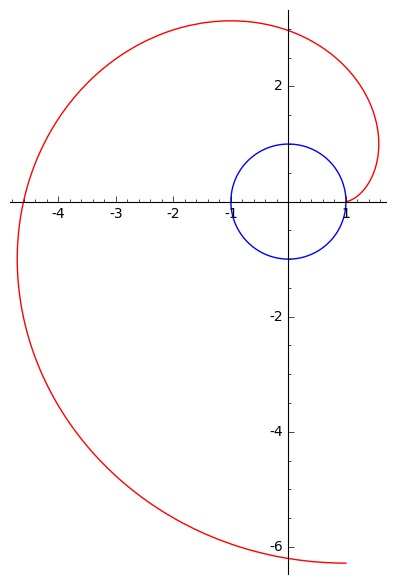

In [17]:
zero(t) = 0; # the number zero does not allow the diff() attribute, so we must define the function 0
c = vector([cos(t),sin(t),zero]); # circle
ci = involute(c);
show(parametric_plot([c[0],c[1]],(t,0,2*pi),color='blue') + parametric_plot([ci[0],ci[1]],(t,0,2*pi),color='red'))

In [18]:
ci

(t*sin(t) + cos(t), -t*cos(t) + sin(t), 0)

The helix and circle have the same involute.

In [19]:
involute(a) == involute(c)

True

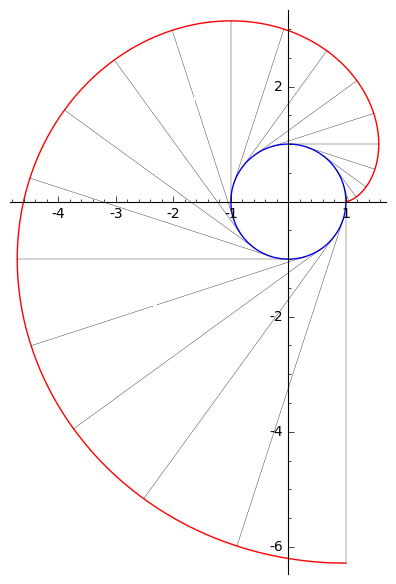

In [20]:
dt = 2*pi/20;
lines = {}
for i in range(21):
    [x1,y1] = [c[0](t=dt*i),c[1](t=dt*i)];
    [x2,y2] = [ci[0](t=dt*i),ci[1](t=dt*i)];
    lines[i] = parametric_plot([t*x1 + (1-t)*x2,t*y1 + (1-t)*y2],(t,0,1),color='black',thickness=0.25);
    
plot_lines = sum(lines[i] for i in range(21));

show(parametric_plot([c[0],c[1]],(t,0,2*pi),color='blue') + parametric_plot([ci[0],ci[1]],(t,0,2*pi),color='red') + plot_lines)

The involute of a space curve is the curve traced out by $-s(t)T(t)$: the vector in the opposite direction of the tangent vector to the curve and with length equal to the arc length of the curve segment subtended.

In [21]:
dt = 2*pi/20;
ai = involute(a);
alines = {}
for i in range(21):
    [x1,y1,z1] = [a[0](t=dt*i),a[1](t=dt*i),a[2](t=dt*i)];
    [x2,y2,z2] = [ai[0](t=dt*i),ai[1](t=dt*i),ai[2](t=dt*i)];
    alines[i] = parametric_plot([t*x1 + (1-t)*x2,t*y1 + (1-t)*y2,t*z1 + (1-t)*z2],(t,0,1),color='black',thickness=0.25);
    
plot_alines = sum(alines[i] for i in range(21));

show(parametric_plot(a,(t,0,2*pi),color='blue',thickness=2) + parametric_plot(ai,(t,0,2*pi),color='red',thickness=2) + plot_alines)

Graphics3d Object

Finally, a gif of the involute curve begin traced out over time.

In [22]:
trace = [plot(point((4*pi,4*pi),color='white')) + plot(point((-4*pi,-4*pi),color='white')) +
        plot(point((c[0](t=aa),c[1](t=aa)),color='black')) + plot(point((ci[0](t=aa),ci[1](t=aa)),color='black')) +
        parametric_plot([c[0],c[1]],(t,0,2*pi),aspect_ratio='automatic',color='blue') + 
        parametric_plot([ci[0],ci[1]],(t,0,aa),color='red') + 
        parametric_plot([t*c[0](t=aa) + (1-t)*ci[0](t=aa),t*c[1](t=aa) + (1-t)*ci[1](t=aa)],(t,0,1),color='black',thickness=0.25)
        for aa in sxrange(0.1,4*pi,0.2)];
movie = animate(trace);

Animation with 63 frames
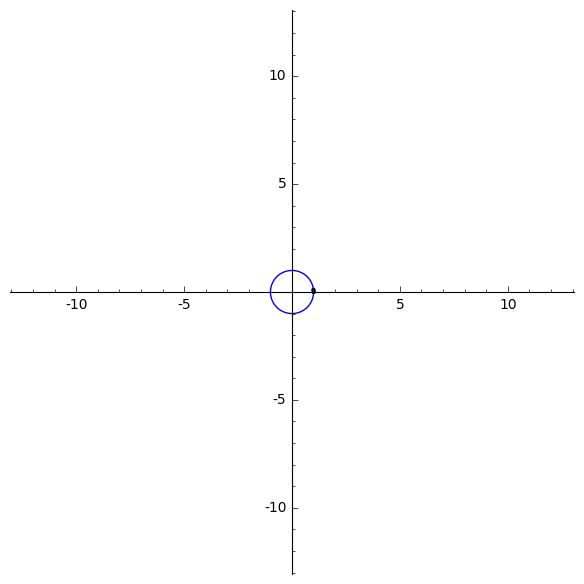

In [23]:
movie

In [24]:
trace2 = [plot(point((-4*pi,-4*pi,0),color='white')) + plot(point((4*pi,4*pi,0),color='white')) +
        plot(point(ceval(a,aa),color='black')) + plot(point(ceval(involute(a),aa),color='black')) +
        parametric_plot3d(a,(t,0,4*pi),aspect_ratio=1,xmin=-4*pi,xmax=4*pi,ymin=-4*pi,ymax=4*pi,color='blue') + 
        parametric_plot3d(involute(a),(t,0,aa),color='red') + 
        parametric_plot3d([t*a[0](t=aa) + (1-t)*involute(a)[0](t=aa),t*a[1](t=aa) + (1-t)*involute(a)[1](t=aa),
                       t*a[2](t=aa) + (1-t)*involute(a)[2](t=aa)],(t,0,1),color='black',thickness=0.25)
        for aa in sxrange(0.1,4*pi,0.2)];
movie2 = animate(trace2);

Animation with 63 frames
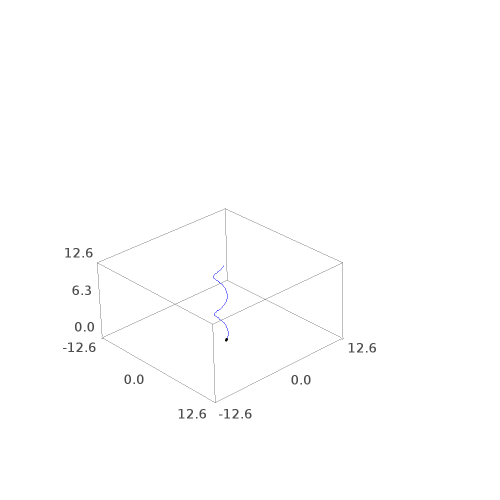

In [25]:
movie2

Revisiting osculating circles.

In [26]:
var('x');
th = var('th',latex_name=r'\theta');
qq(x) = sin(x);
param_qq = [t,qq(t)];
graph_qq = plot(qq,(x,-2*pi,2*pi),ymin=-5,ymax=5,aspect_ratio=1);
trace3 = [plot(point((aa,qq(x=aa)),color='black')) + graph_qq + 
        parametric_plot(osc2d(param_qq,aa),(t,0,2*pi),color='red',thickness=0.25)
        for aa in sxrange(-2*pi,2*pi,0.05)];
movie3 = animate(trace3);

Animation with 252 frames
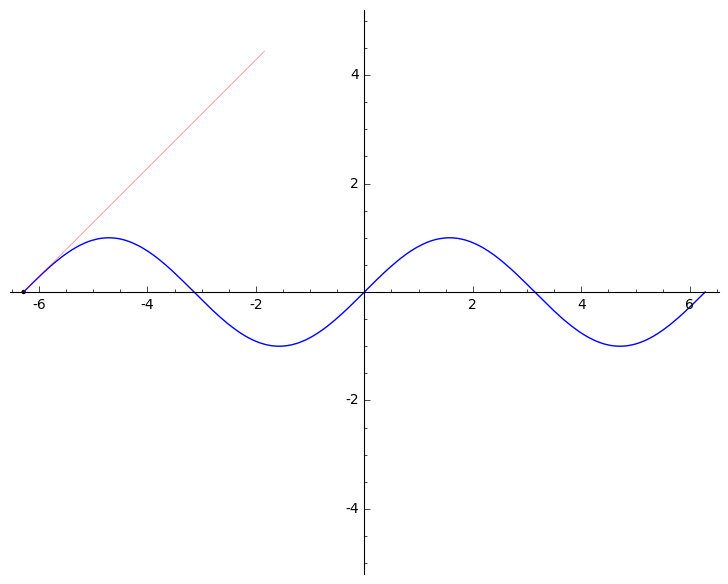

In [27]:
movie3

And a GIF of the Frenet frame along a space curve.

In [28]:
trace4 = [plot(point((2,2,-1),size=0.25,color='white')) + plot(point((-2,-2,13.4),size=0.25,color='white')) +
        parametric_plot3d(a,(t,0,4*pi),aspect_ratio=1,xmin=-4*pi,xmax=4*pi,ymin=-4*pi,ymax=4*pi,color='blue') + 
        plot((1/3)*ceval(tan(a),aa), start=ceval(a,aa), color='red', width='1.5') +
        plot((1/3)*ceval(nor(a),aa), start=ceval(a,aa), color='green', width='1.5') +
        plot((1/3)*ceval(binor(a),aa), start=ceval(a,aa), color='purple', width='1.5') +
        parametric_plot3d(osc(a,aa),(t,0,2*pi),color='cyan',thickness=0.25)
        for aa in sxrange(0,4*pi,0.2)];
movie4 = animate(trace4);

Animation with 63 frames
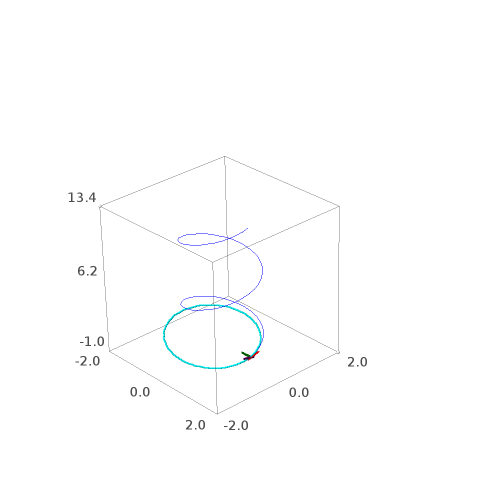

In [29]:
movie4

In [30]:
tan(a).dot_product(binor(a)).simplify_full()

0

In [31]:
nor(a).dot_product(binor(a)).simplify_full()

0

In [32]:
jc = [2*t,t^2,t^3/3];

In [33]:
trace5 = [plot(point((4,4,-3),size=0.25,color='white')) + plot(point((-2,-2,3),size=0.25,color='white')) +
        parametric_plot3d(jc,(t,-2,2),aspect_ratio=1,xmin=-4,xmax=4,ymin=-4,ymax=4,color='blue') + 
        plot((1/3)*ceval(tan(jc),aa), start=ceval(jc,aa), color='red', width='1.5') +
        plot((1/3)*ceval(nor(jc),aa), start=ceval(jc,aa), color='green', width='1.5') +
        plot((1/3)*ceval(binor(jc),aa), start=ceval(jc,aa), color='purple', width='1.5') +
        parametric_plot3d(osc(jc,aa),(t,0,2*pi),color='cyan',thickness=0.25)
        for aa in sxrange(-2,2,0.2)];
movie5 = animate(trace5);

Animation with 20 frames
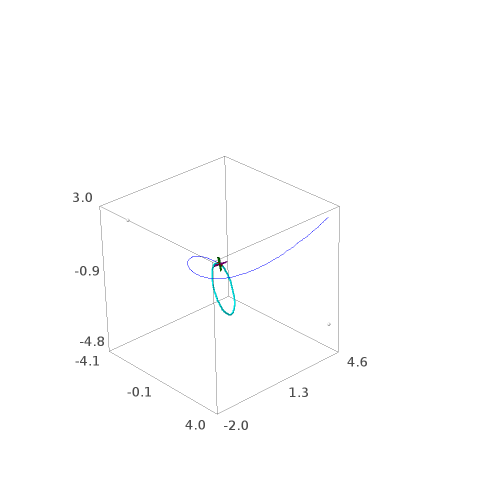

In [34]:
movie5

In [35]:
tor(jc)

2/sqrt(t^4 + 4*t^2 + 4)

In [36]:
curv(jc)

sqrt(4*t^2 + 4)/sqrt(t^4 + 4*t^2 + 4)